# <span style="color:green"> Laboratorio di Simulazione Numerica (LSN) </span>

Nome: Davide Castellani  
Matricola: 967270  
email: davide.castellani1@studenti.unimi.it

## <span style="color:red">  Esercitazione 08 </span>

Quest'esercitazione mira a produrre un codice Monte Carlo variazionale che simuli una particella quantistica in un potenziale unidimensionale dato.

### Principio variazionale e ground state

In meccanica quantistica vale il seguente principio:  
_il valore di aspettazione dell'Hamiltoniana $\hat{H}$ in uno stato di prova $\Psi_T(x)$ ha come limite inferiore l'energia $E_0$ dello stato fondamentale $\Psi_0(x)$_, ovvero:

$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} \ge E_0 =
\frac{\langle \Psi_0| {\hat H} | \Psi_0 \rangle}
{\langle \Psi_0 | \Psi_0 \rangle}
$$

Prendiamo dunque la seguente Hamiltoniana

$$
\hat{H}=-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}+V(x)
\hspace{0.5 cm}
\hbox{con}
\hspace{0.5 cm}
V(x)=x^4-\frac{5}{2}x^2
$$

Questo potenziale non è risolvibile analiticamente e di conseguenza, se vogliamo trovare il ground state, dobbiamo per forza di cose approcciare il problema numericamente. 

## <span style="color:blue"> Esercizio 08.1 </span>

L'idea è di sfruttare il Principio Variazionale sopracitato, partendo da una funzione d'onda di prova ragionevole che dipende da un set di parametri variazionali. In questo caso è stata utilizzata una sovrapposizione di due gaussiane, dove i parametri variazionali sono i loro centri ($\pm\mu$) e le loro deviazioni standar ($\sigma$)

$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$

Fissati i valori di $\sigma$ e $\mu$, si può campionare un'approssimazione del modulo quadro della funzione d'onda del ground state con un codice di ottimizzazione che cerca di minimizzare il valore di aspettazione dell'Hamiltoniana

$$
\langle {\hat H} \rangle_T = 
\int dx \frac{|\Psi_T^{\sigma,\mu}(x)|^2}{\int dx |\Psi^{\sigma,\mu}_T(x)|^2} \frac{{\hat H} \Psi^{\sigma,\mu}_T(x)}{\Psi^{\sigma,\mu}_T(x)} = \\
\int dx \frac{|\Psi^{\sigma,\mu}_T(x)|^2}{\int dx |\Psi^{\sigma,\mu}_T(x)|^2}\bigg[\frac{{-\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2}} \Psi_T^{\sigma,\mu}(x)}{\Psi_T^{\sigma,\mu}(x)} + x^4-\frac{5}{2}x^2\bigg]
$$

Per la simulazione sono stati posti $m=1$ e $\hbar=1$

## <span style="color:blue"> Esercizio 08.2 </span>

Per trovare i parametri $\sigma$ e $\mu$ ottimali, dobbiamo introdurre una seconda ricerca Monte Carlo esterna che, al posto di muovere la posizione, muove i parametri.  
L'algoritmo utilizzato per fare ciò è un _Simulated Annealing_ (SA), grazie al quale lo spazio delle configurazioni viene inizialmente esplorato in modo molto casuale (se la temperatura è alta, è più probabile che soluzioni peggiori vengano accettate) ma che gradualmente, riducendo la temperatura, si muove verso la configurazione migliore, dove l'energia è minima. Ciò permette di evitare di rimanere facilmente bloccati in un minimo locale.

In seguito i grafici che mostrano $\langle \hat{H}\rangle_t$ in funzione dello step del SA e l'evoluzione dei parametri $\mu$ e $\sigma$ durante il raffreddamento.

### $\langle H \rangle_T$ in funzione dello step del SA

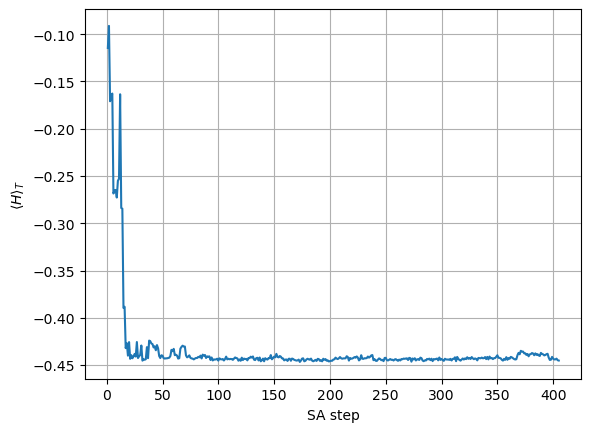

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Carico i dati dal file
data = np.loadtxt("ham.out")

# Seleziono le colonne che mi interessano
x = data[:,1] # Prima colonna (SAstep)
y = data[:,2] # Quarta colonna (<H>)
errors = data[:,3] #Quinta colonna (errore)

# Disegna il grafico
plt.errorbar(x, y, yerr=0, fmt='-')
plt.xlabel("SA step")
plt.ylabel(r"$\langle H \rangle_T$")
plt.grid(True)
plt.show()

## Andamento di $\mu$ e $\sigma$

Parametri ottimizzanti:
mu =  0.811562
sigma =  0.615205


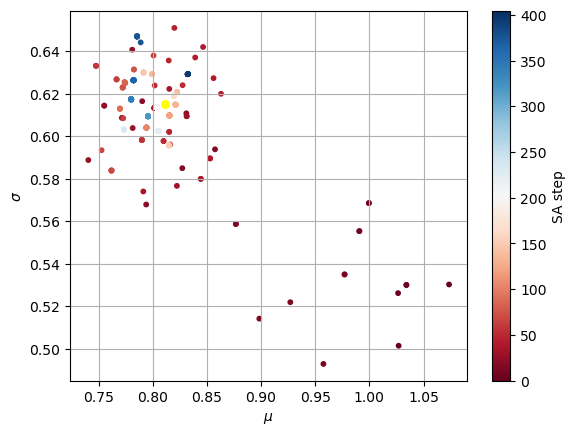

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Carico i dati dal file
data = np.loadtxt("param.out")

# Seleziono le colonne che mi interessano
x = data[:,2] # mu
y = data[:,3] # sigma

# Sequenza di colori
colors = np.arange(len(x))

# Creazione dello scatter plot con punti colorati
plt.scatter(x, y, c=colors, cmap='RdBu', s=10)

# Aggiunta di una barra dei colori
plt.colorbar().set_label('SA step')

# Colora l'ultimo punto di giallo
last_point = len(x) - 1
plt.scatter(x[last_point], y[last_point], c='yellow', s=30)

best_mu = x[last_point]
best_sigma = y[last_point]

# Stampa le coordinate dell'ultimo punto
print("Parametri ottimizzanti:")
print("mu = ", best_mu)
print("sigma = ", best_sigma)

# Disegna il grafico
plt.xlabel(r"$\mu$")
plt.ylabel(r"$\sigma$")
plt.grid(True)
plt.show()

Per i valori finali dei parametri, sono anche stati graficati i valori di $\langle\hat{H}\rangle_T$ progressivi in funzione degli step Monte Carlo interni.

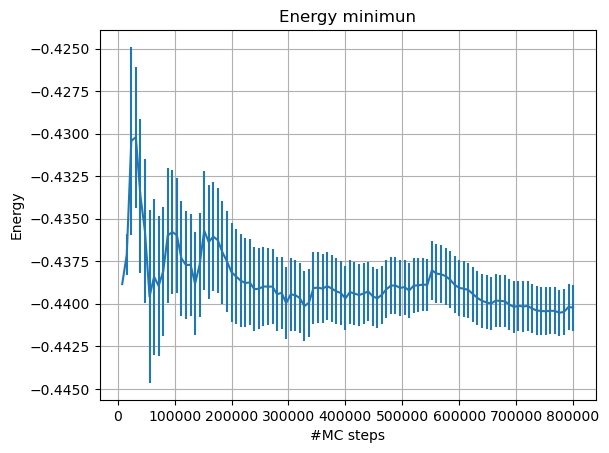

In [3]:
energy_min_data = np.loadtxt('FinalHam.out')
energy_min = energy_min_data[:, 2]
energy_min_err = energy_min_data[:,3]

M = 8000   # Number of throws in each block
N = 100     # Number of blocks

x = np.arange(1, len(energy_min)+1) * M
# Plot for Potential Energy
plt.errorbar(x, energy_min, yerr=energy_min_err)
plt.xlabel('#MC steps')
plt.ylabel('Energy')
plt.title('Energy minimun')
plt.grid(True)
plt.show()

Infine, riempiendo un istogramma con le configurazioni campionate, è stato graficato $|\Psi_T(x)|^2$ e confrontata con la soluzione numerica ottenuta trasformndo l'equazione di Schrodinger in un'equazione matriciale.

Numerical ground state energy:  -0.46087005151524046


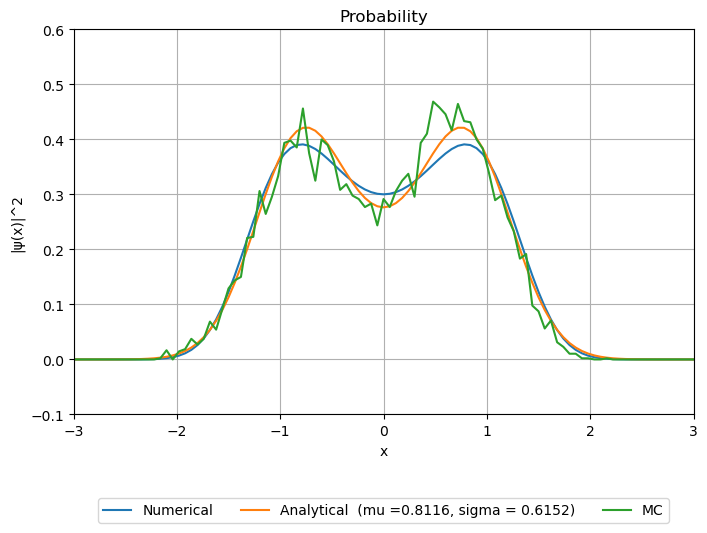

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2
    
def Psi2(x):
    return (np.exp(-(x-best_mu)**2/(2.0 * best_sigma**2)) + np.exp(-(x+best_mu)**2/(2.0 * best_sigma**2)))**2

hbar = 1
m = 1
a = 6
N = 101 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

#normalize Analytical
psi2min = Psi2(x)
psi2min = psi2min / (a*np.mean(psi2min))

#Load histo
data = np.loadtxt('Psi2_Histogram.out')
psi2MC = data[:, 1]

print("Numerical ground state energy: ", E[0])

# Plot a few things
plt.figure(figsize=(8,5))
plt.plot(x, (psi[0]**2), label = 'Numerical')
plt.plot(x, psi2min, label = 'Analytical  (mu =' + "{:.4f}".format(best_mu) +', sigma = ' +"{:.4f}".format(best_sigma)+')')
plt.plot(x, psi2MC, label = 'MC')
plt.title("Probability")
plt.xlabel("x")
plt.ylabel("|ψ(x)|^2")
plt.grid(True)
plt.xlim((-3,3))
plt.ylim((-0.1, 0.6))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=3)
plt.show()